<a href="https://colab.research.google.com/github/HARIOMSAR/ADVERTISING/blob/main/air_passengers_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TS is a collection of data points collected at constant time intervals. These are analyzed to determine the long term trend so as to forecast the future or perform some other form of analysis.<br>We’ll be using the popular AirPassengers data set.

# Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings

# Import the AirPassengers dataset

In [4]:
passengers = pd.read_csv('/content/AirPassengers.csv')

In [5]:
passengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Converting the 'Month' column into proper date time format

In [6]:
dates = pd.date_range(start='1949-01-01', freq='MS',periods=len(passengers))

In [7]:
dates

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [8]:
passengers['Month'] = dates.month
passengers['Year'] = dates.year

In [9]:
passengers.head()

,Month,#Passengers,Year
0,1,112,1949
1,2,118,1949
2,3,132,1949
3,4,129,1949
4,5,121,1949


### To get the names of the month

In [10]:
passengers.dtypes

Month          int64
#Passengers    int64
Year           int64
dtype: object

In [11]:
passengers.head()

,Month,#Passengers,Year
0,1,112,1949
1,2,118,1949
2,3,132,1949
3,4,129,1949
4,5,121,1949


In [12]:
import calendar
passengers['Month'] = passengers['Month'].apply(lambda x: calendar.month_abbr[x])
passengers.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
passengers = passengers[['Month','Year','Passengers']]

In [13]:
passengers.head()

,Month,Year,Passengers
0,Jan,1949,112
1,Feb,1949,118
2,Mar,1949,132
3,Apr,1949,129
4,May,1949,121


In [14]:
passengers.head()

,Month,Year,Passengers
0,Jan,1949,112
1,Feb,1949,118
2,Mar,1949,132
3,Apr,1949,129
4,May,1949,121


In [15]:
passengers['Date'] = dates
passengers.set_index('Date',inplace=True)

In [16]:
passengers.head()

,Month,Year,Passengers
Date,,,
1949-01-01,Jan,1949,112
1949-02-01,Feb,1949,118
1949-03-01,Mar,1949,132
1949-04-01,Apr,1949,129
1949-05-01,May,1949,121


# Exploratory Data Analysis

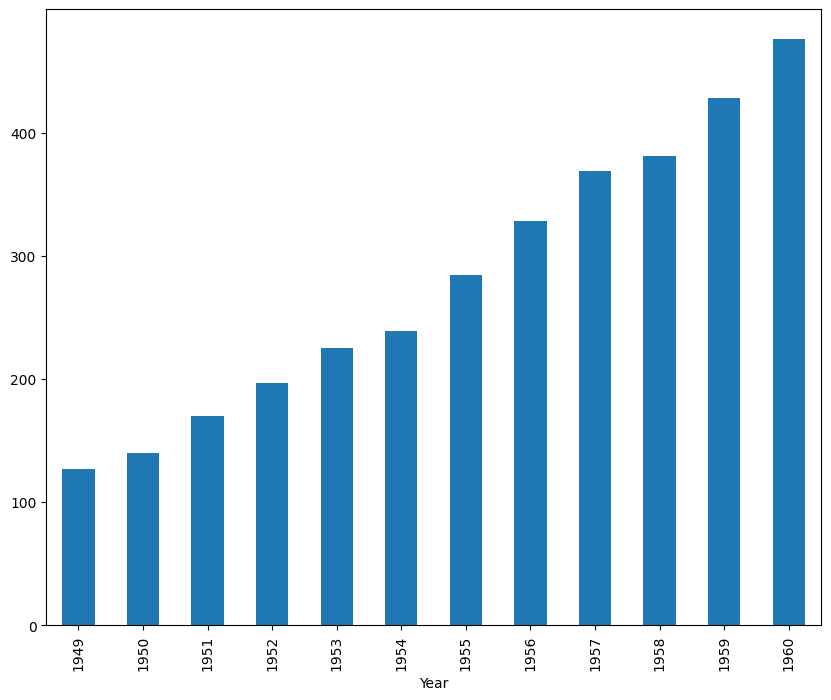

In [17]:
plt.figure(figsize=(10,8))
passengers.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

In [18]:
print('From the above figure we can see that passengers are increasing with the increase in the year')

From the above figure we can see that passengers are increasing with the increase in the year


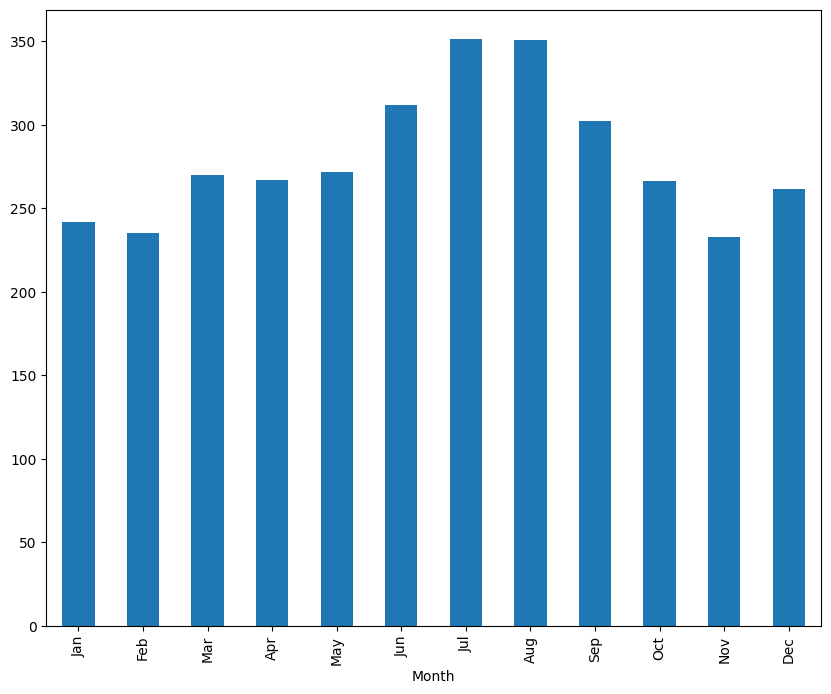

In [19]:
plt.figure(figsize=(10,8))
passengers.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

In [20]:
print('From the above figure we can see that more passengers can be seen between months June to September.')

From the above figure we can see that more passengers can be seen between months June to September.


# Lets plot the data to see the trend and seasonality

In [21]:
passengers_count = passengers['Passengers']

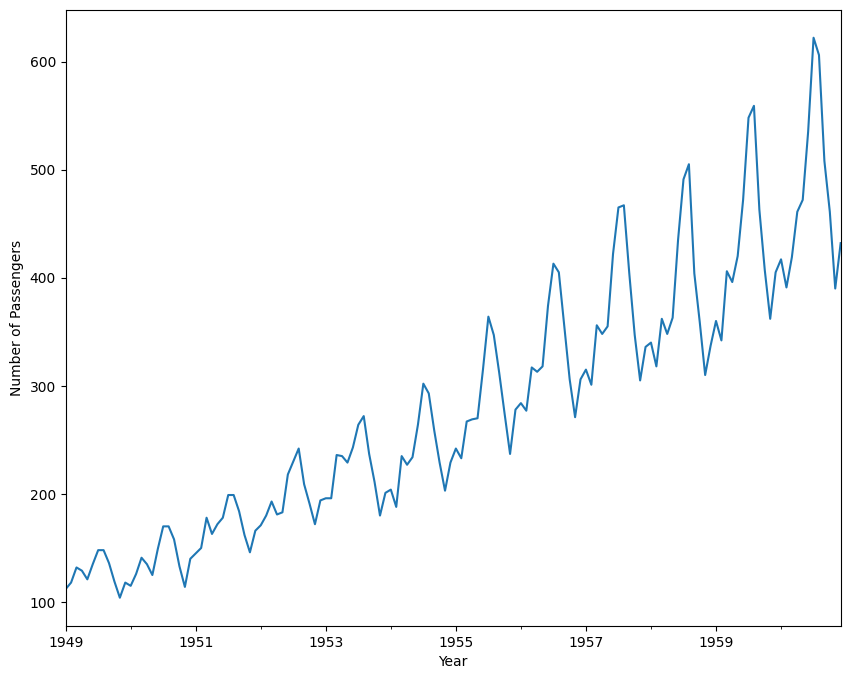

In [22]:
plt.figure(figsize=(10,8))
passengers_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

## Now we start with time series decomposition of this data to understand underlying patterns such as trend, seasonality, cycle and irregular remainder


In [23]:
decompose = sm.tsa.seasonal_decompose(passengers_count,model='multiplicative',extrapolate_trend=8)

Text(0.5, 0.98, 'Decomposition of Time Series')

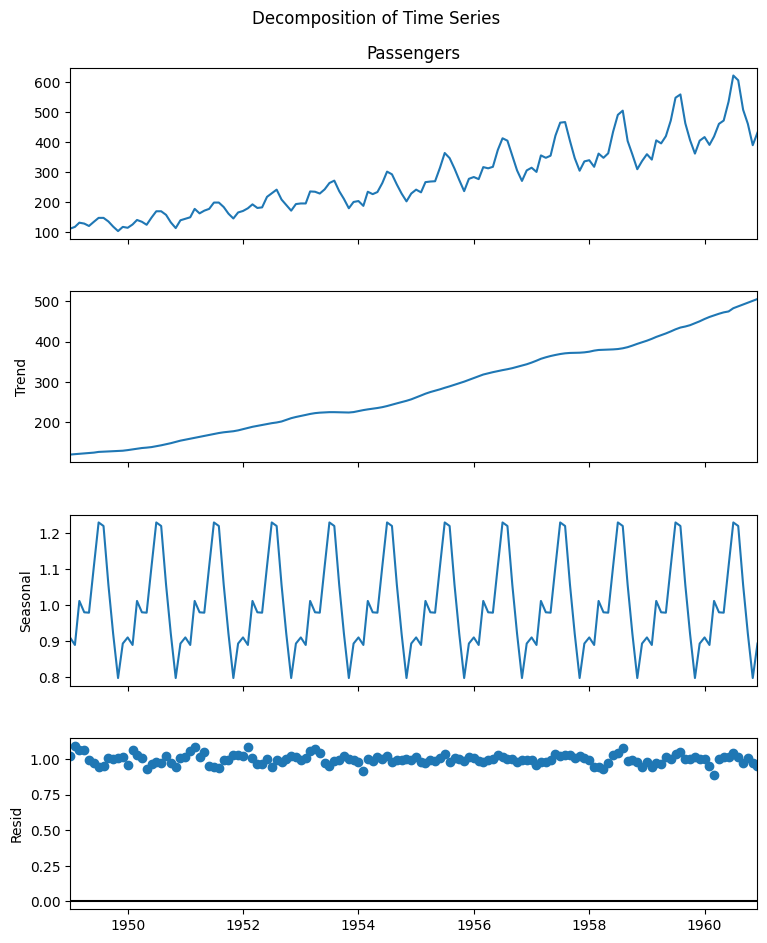

In [24]:
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')

<b> Trend</b><br>
Time Series Decomposition: To begin with let's try to decipher trends embedded in the above tractor sales time series. It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences.<br> So, more formally, we can check stationarity using the following: Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean that at any instant 't', we'll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.<br>
Now, let’s try to remove wrinkles from our time series using moving average. We will take moving average of different time periods i.e. 4,6,8, and 12 months as shown below. Here, moving average is shown in <b>orange</b> and actual series in <b>blue</b>.

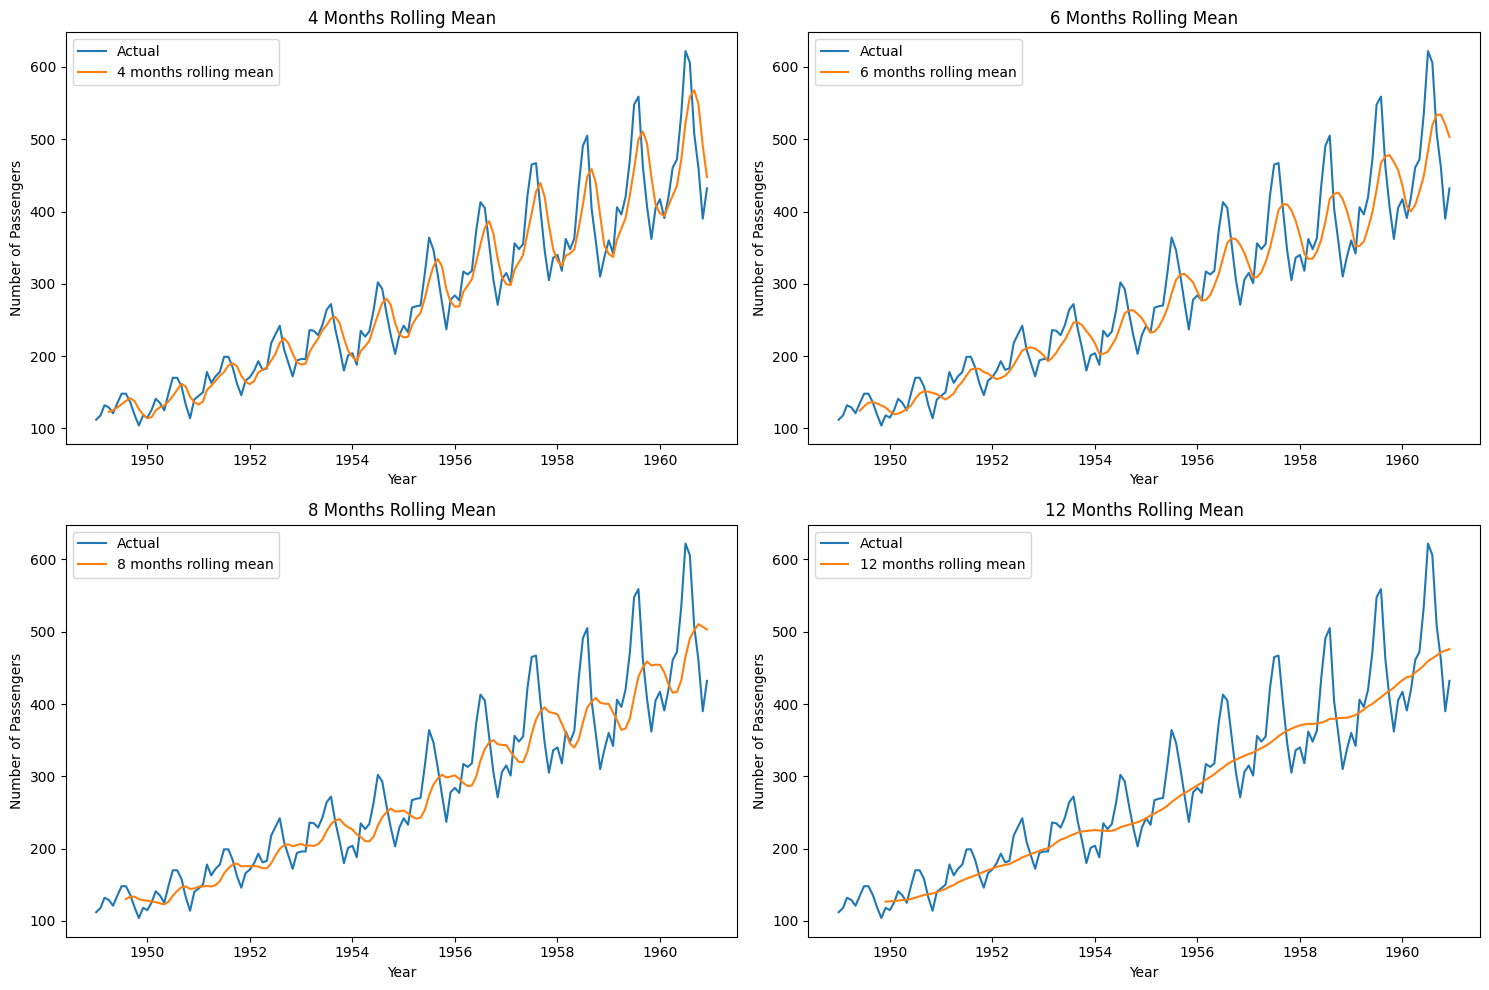

In [25]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(passengers.index,passengers_count,label='Actual')
axes[0][0].plot(passengers.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(passengers.index,passengers_count,label='Actual')
axes[0][1].plot(passengers.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(passengers.index,passengers_count,label='Actual')
axes[1][0].plot(passengers.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(passengers.index,passengers_count,label='Actual')
axes[1][1].plot(passengers.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

As we could see in the above plots, 12-month moving average could produce a wrinkle free curve as desired. This on some level is expected since we are using month-wise data for our analysis and there is expected monthly-seasonal effect in our data.

<b>Seasonality</b><br>
Let us see how many passengers travelled in flights on a month on month basis. We will plot a stacked annual plot to observe seasonality in our data.

In [26]:
passengers.head()

,Month,Year,Passengers
Date,,,
1949-01-01,Jan,1949,112
1949-02-01,Feb,1949,118
1949-03-01,Mar,1949,132
1949-04-01,Apr,1949,129
1949-05-01,May,1949,121


In [27]:
monthly = pd.pivot_table(data=passengers,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [28]:
monthly

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


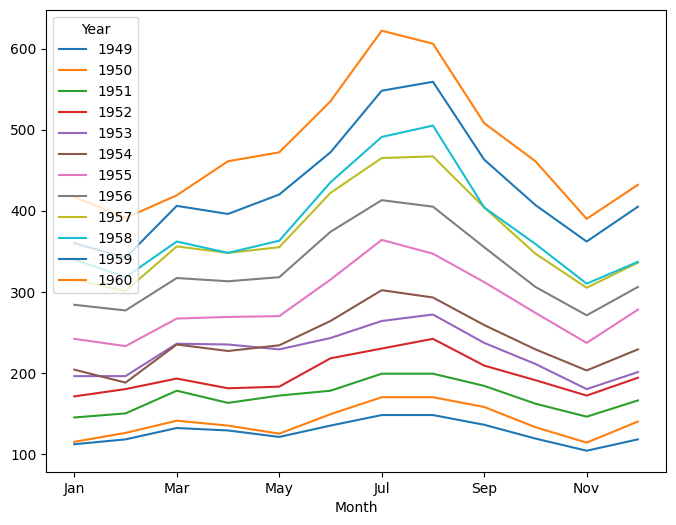

In [29]:
monthly.plot(figsize=(8,6))
plt.show()

In [30]:
yearly = pd.pivot_table(data=passengers,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [31]:
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


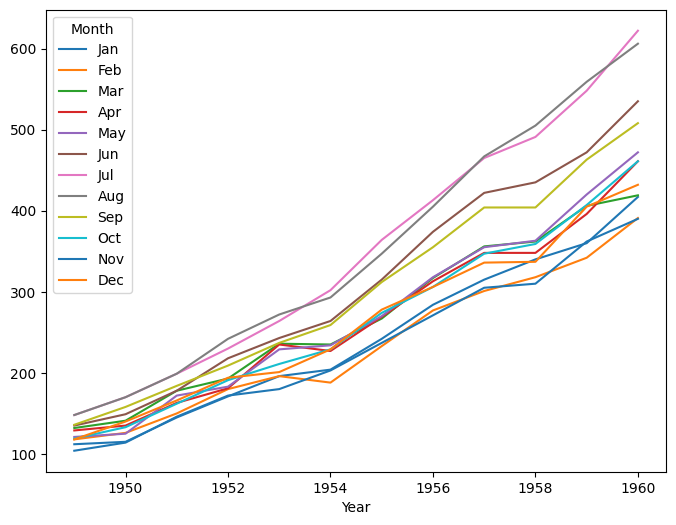

In [32]:
yearly.plot(figsize=(8,6))
plt.show()

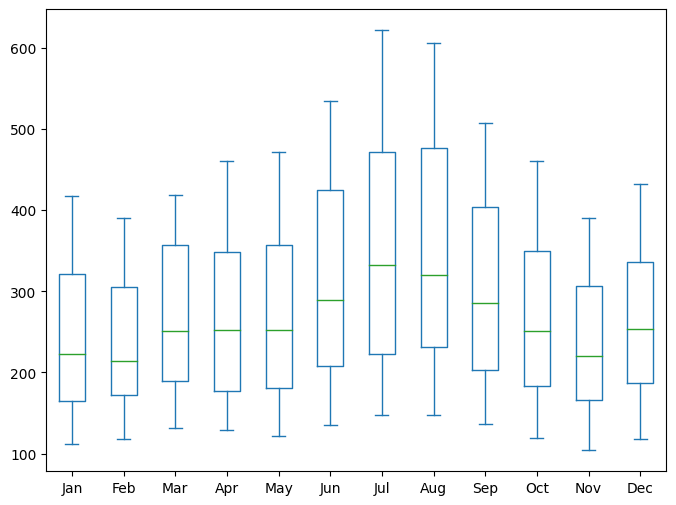

In [33]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

### Important Inferences

The passengers are increasing without fail every year.<br><br>
July and August are the peak months for passengers.<br>

We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing trend in the beginning of the year and drops down towards the end of the year. We can see a seasonal effect with a cycle of 12 months.


# ARIMA Modelling

### Dickey-Fuller Test
The most important assumption of auto regressive method is that the TS data should be stationary.<br>

Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [34]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_count)

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [35]:
adfuller_results = pd.Series(adfuller(passengers_count)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_count)[4].items():
    adfuller_results['Critical Value'+' '+ key] = value
print(adfuller_results)

T stats                     0.815369
p-value                     0.991880
lags used                  13.000000
Number of observations    130.000000
Critical Value 1%          -3.481682
Critical Value 5%          -2.884042
Critical Value 10%         -2.578770
dtype: float64


The p-value is greater than 0.05 (Coinfidence Interval 95%).<br>

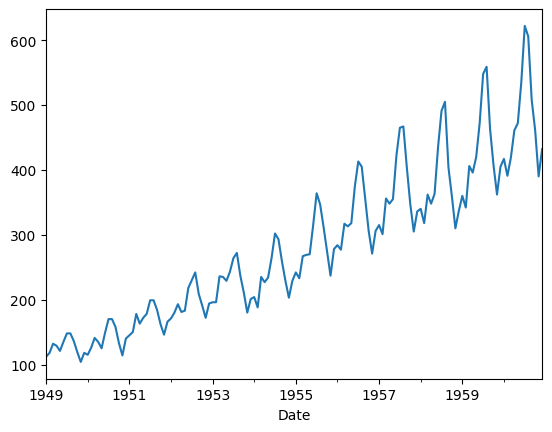

In [36]:
passengers_count.plot()
plt.show()

Let's do log transformation to convert the TS to stationary TS

In [37]:
passengers_log = np.log10(passengers_count)

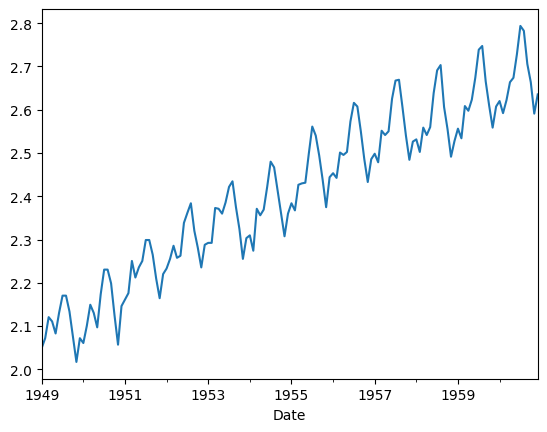

In [38]:
passengers_log.plot()
plt.show()

In [39]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_log)
adfuller_results = pd.Series(adfuller(passengers_log)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_log)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                    -1.717017
p-value                     0.422367
lags used                  13.000000
Number of observations    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


The p-value is still greater than 0.05 (Coinfidence Interval 95%).<br>
The log transformation has made variance stationary but mean is still increasing.<br>
Let's try differencing by 1.

In [40]:
diff1 = passengers_count.diff(1)
diff1.head()

Date
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: Passengers, dtype: float64

In [41]:
diff1.dropna(axis=0,inplace=True)

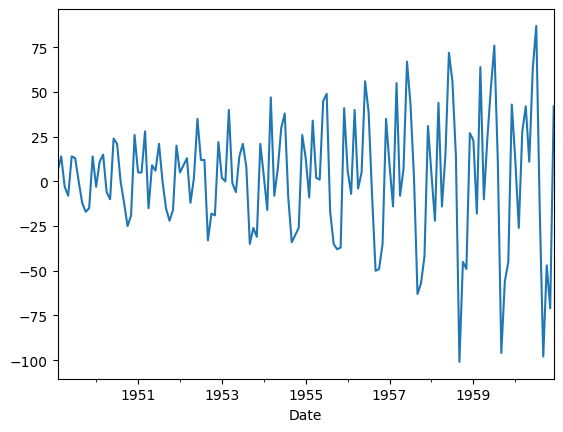

In [42]:
diff1.plot()
plt.show()

In [43]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(diff1)
adfuller_results = pd.Series(adfuller(diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                    -2.829267
p-value                     0.054213
lags used                  12.000000
Number of observations    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


The p-value is still greater than 0.05 (Coinfidence Interval 95%).<br>
The differencing by 1 has made mean stationary but variance is changing.<br>
Let's try differencing by 1 on the log transformation.

In [44]:
log_diff1 = passengers_log.diff(1)
log_diff1.head()

Date
1949-01-01         NaN
1949-02-01    0.022664
1949-03-01    0.048692
1949-04-01   -0.009984
1949-05-01   -0.027804
Name: Passengers, dtype: float64

In [45]:
log_diff1.dropna(axis=0,inplace=True)

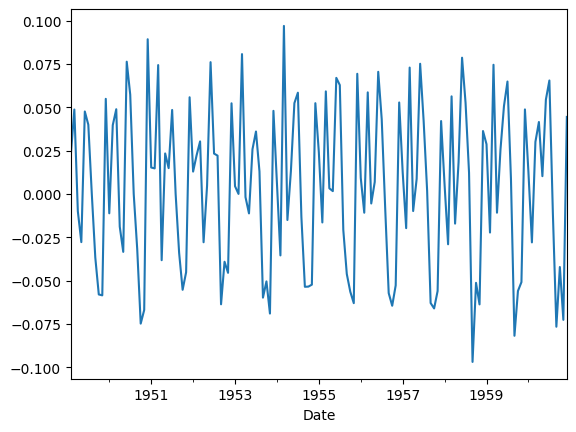

In [46]:
log_diff1.plot()
plt.show()

In [47]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff1)
adfuller_results = pd.Series(adfuller(log_diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                    -2.717131
p-value                     0.071121
lags used                  14.000000
Number of observations    128.000000
Critical Value (1%)        -3.482501
Critical Value (5%)        -2.884398
Critical Value (10%)       -2.578960
dtype: float64


p-value is still greateer than 0.05.

In [48]:
log_diff2 = passengers_log.diff(2)
log_diff2.head()

Date
1949-01-01         NaN
1949-02-01         NaN
1949-03-01    0.071356
1949-04-01    0.038708
1949-05-01   -0.037789
Name: Passengers, dtype: float64

In [49]:
log_diff2.dropna(axis=0,inplace=True)

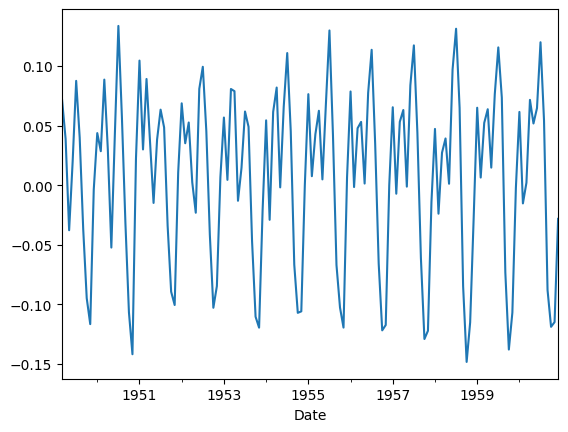

In [50]:
log_diff2.plot()
plt.show()

In [51]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff2)
adfuller_results = pd.Series(adfuller(log_diff2)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff2)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                    -3.167907
p-value                     0.021919
lags used                  11.000000
Number of observations    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


p-value is less than 0.05. In this case we reject null hypothesis that TS is non stationary.

# ARIMA Modeling
ARIMA is a combination of 3 parts i.e. AR (AutoRegressive), I (Integrated), and MA (Moving Average). A convenient notation for ARIMA model is ARIMA(p,d,q). Here p,d, and q are the levels for each of the AR, I, and MA parts. Each of these three parts is an effort to make the final residuals display a white noise pattern (or no pattern at all). In each step of ARIMA modeling, time series data is passed through these 3 parts like a sugar cane through a sugar cane juicer to produce juice-less residual. The sequence of three passes for ARIMA analysis is as following:

1st Pass of ARIMA to Extract Juice / Information
Integrated (I) – subtract time series with its lagged series to extract trends from the data
In this pass of ARIMA juicer, we extract trend(s) from the original time series data. Differencing is one of the most commonly used mechanisms for extraction of trends. Here, the original series is subtracted with it’s lagged series e.g. November’s sales values are subtracted with October’s values to produce trend-less residual series. The formulae for different orders of differencing are as follow:

- No Differencing (d=0) |  Y′t=YtYt′=Yt
- 1st Differencing (d=1) |  Y′t=Yt−Yt−1Yt′=Yt−Yt−1
- 2nd Differencing (d=1) |  Y′t=Yt−Yt−1−(Yt−1−Yt−2)=Yt−2×Yt−1+Yt−2Yt′=Yt−Yt−1−(Yt−1−Yt−2)=Yt−2×Yt−1+Yt−2

## Identification of best fit ARIMA model

In order to fit the time series data with a seasonal ARIMA model, we need to first find the the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest such as AIC or BIC. There are many guidelines and best practices to achieve this goal, yet the correct parametrization of ARIMA models can be a painstaking manual process that requires domain expertise and time. Auto arima function in forecast package in R helps us identify the best fit ARIMA model on the fly but in Python we will generate combination of p,d and q to select the optimal parameter values for our ARIMA(p,d,q)(P,D,Q)s time series model.
This technique is known as "grid search" where we iteratively explore different combinations of parameters. For each such combination of parameters, we try to fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess AIC or BIC score. The model with the best score wins and the parmeters for that model are the optimal parmeters.

### Iterate the process to find the best values for p, d, q and P, D, Q

In [52]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0,1)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [53]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [54]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,3)
P = Q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [55]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [73]:
import sys
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:

        try:
            temp_model = sm.tsa.statespace.SARIMAX(log_diff2,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

           # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


Best SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 model - AIC:-671.0386663580828


Best SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 model - AIC:-671.0386830029513 The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values.

Predict sales on in-sample date using the best fit ARIMA model

The next step is to predict passengers for in-sample data and find out how close is the model prediction on the in-sample data to the actual truth.

In [74]:
sarima = sm.tsa.statespace.SARIMAX(log_diff2,order=(1,0,1),seasonal_order=(1,0,1,12),enforce_invertibility=False,enforce_stationarity=False)

In [75]:
sarima_results = sarima.fit()

In [76]:
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  142
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 340.519
Date:                            Fri, 01 Sep 2023   AIC                           -671.039
Time:                                    19:35:01   BIC                           -656.779
Sample:                                03-01-1949   HQIC                          -665.245
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.085     -4.022      0.000      -0.510      -0.176
ma.L1          1.0000     91.015   

In [77]:
passengers_count.tail(15)

Date
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, dtype: int64

In [78]:
prediction = sarima_results.get_prediction(start=pd.to_datetime('1960-01-01'),full_results=True)

In [79]:
prediction = sarima_results.get_prediction(start=pd.to_datetime('1960-01-01'),full_results=True)

In [80]:
predicted_values = np.power(10,prediction.predicted_mean)

In [81]:
predicted_values

1960-01-01    1.164776
1960-02-01    0.980596
1960-03-01    1.105667
1960-04-01    1.073661
1960-05-01    1.100324
1960-06-01    1.189987
1960-07-01    1.300381
1960-08-01    1.167644
1960-09-01    0.825833
1960-10-01    0.733347
1960-11-01    0.789769
1960-12-01    0.952834
Freq: MS, Name: predicted_mean, dtype: float64

In [82]:
actual = passengers_count['1960-01-01':]

In [83]:
actual

Date
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, dtype: int64

In [84]:
# mean absolute percentage error
mape = np.mean(np.abs(actual - predicted_values)/actual)
mape

0.99780925137526

In [85]:
# mean square error
mse = np.mean((actual - predicted_values) ** 2)
mse

231279.09180657065

Forecast sales using the best fit ARIMA model¶

The next step is to foercast passengers for next 3 years i.e. for 1961, 1962, and 1963 through the above model.

In [86]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = sarima_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = sarima_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [87]:
pred_ci_99.head()

,lower Passengers,upper Passengers
1961-01-01,0.029129,0.093060
1961-02-01,-0.046847,0.029308
1961-03-01,-0.012161,0.065303
1961-04-01,0.024650,0.102267
1961-05-01,-0.012169,0.065466


In [88]:
pred_ci_95.head()

,lower Passengers,upper Passengers
1961-01-01,0.029129,0.093060
1961-02-01,-0.046847,0.029308
1961-03-01,-0.012161,0.065303
1961-04-01,0.024650,0.102267
1961-05-01,-0.012169,0.065466


In [90]:
n_steps = 36
idx = pd.date_range(passengers_count.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]),
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]),
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [91]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
1960-12-01,1.151051,1.069373,1.238968
1961-01-01,0.980010,0.897744,1.069814
1961-02-01,1.063092,0.972386,1.162260
1961-03-01,1.157333,1.058400,1.265513
1961-04-01,1.063281,0.972368,1.162694


In [92]:
fc_99.head()

,lower_ci_99,upper_ci_99
1960-12-01,1.069373,1.238968
1961-01-01,0.897744,1.069814
1961-02-01,0.972386,1.162260
1961-03-01,1.058400,1.265513
1961-04-01,0.972368,1.162694


In [93]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1960-12-01,1.151051,1.069373,1.238968,1.069373,1.238968
1961-01-01,0.980010,0.897744,1.069814,0.897744,1.069814
1961-02-01,1.063092,0.972386,1.162260,0.972386,1.162260
1961-03-01,1.157333,1.058400,1.265513,1.058400,1.265513
1961-04-01,1.063281,0.972368,1.162694,0.972368,1.162694


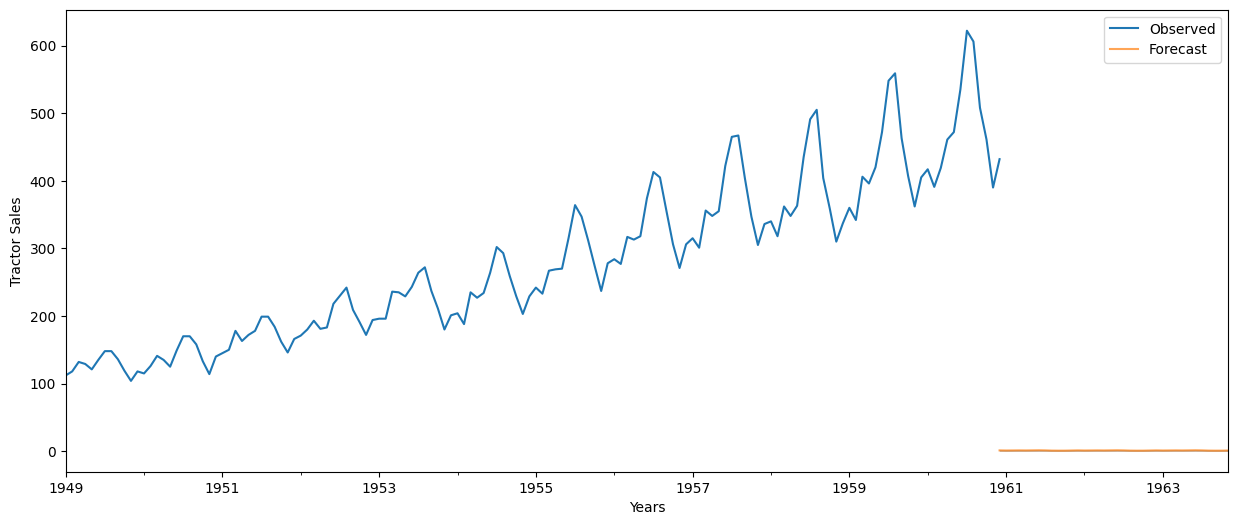

In [94]:
# plot the forecast along with the confidence band
axis = passengers_count.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

Diagnostics¶


1. Errors follows normality
2. Errors should not have auto correlation (ACF, no spikes beyond the limits)
3. Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly)

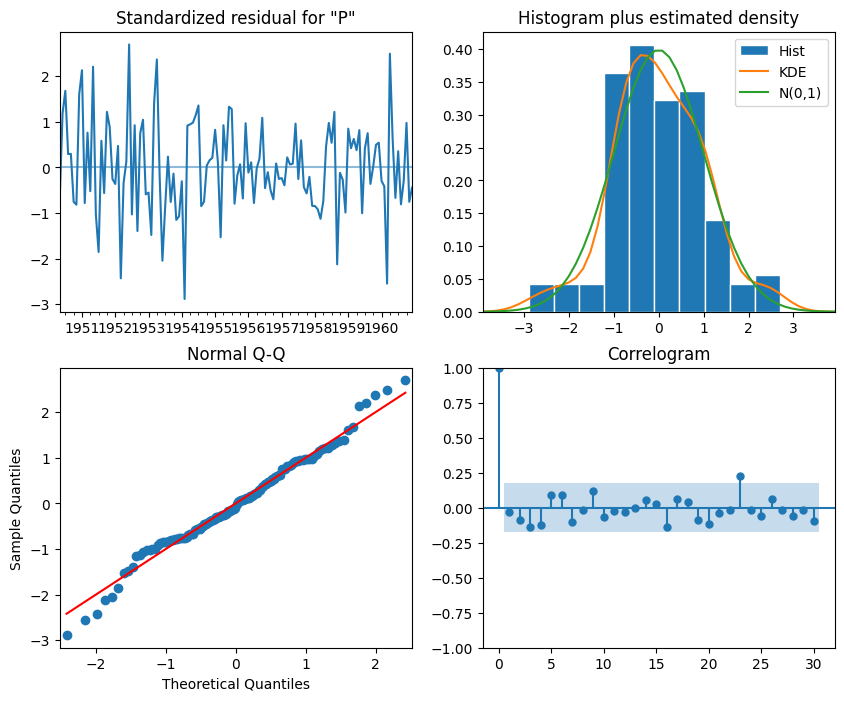

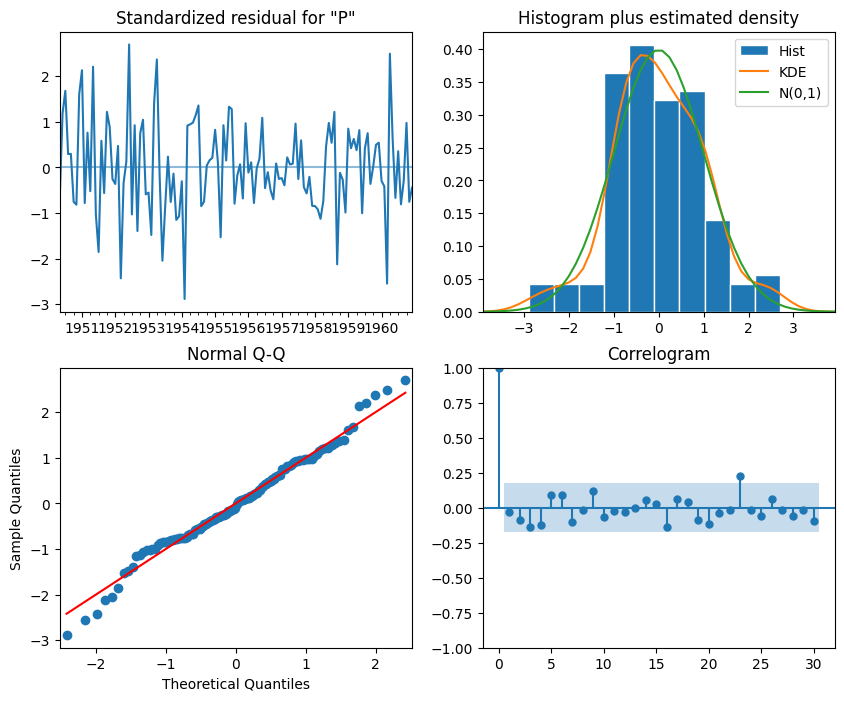

In [95]:
sarima_results.plot_diagnostics(lags=30,figsize=(10,8))

The KDE plot of the residuals on the top right is almost similar with the normal distribution.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.